In [ ]:
import tensorflow as tf
import os
import numpy as np
import random as rand

from tqdm import tqdm #tqdm is a Python library which is used for creating a progress bar. It is typically used to display the progress of a lengthy operation and it provides a visual cue that processing is underway.

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/sementic_segmentation/data/stage1_train'
TEST_PATH = '/content/drive/MyDrive/sementic_segmentation/data/stage1_test'

In [ ]:
seed = 42
np.random.seed = seed
np.random.seed = seed

In [ ]:
train_ids = next(os.walk(TRAIN_PATH))[1] #The next() function returns the next item in an iterator. next(os.walk(TRAIN_PATH)) returns a tuple
test_ids = next(os.walk(TEST_PATH))[1]

In [ ]:
print(next(os.walk(TRAIN_PATH)))

('/content/drive/MyDrive/sementic_segmentation/data/stage1_train', ['6c67b78e8164801059375ed9a607f61e67a7ae347e92e36a7f20514224541d56', '68f833de9f8c631cedd7031b8ed9b908c42cbbc1e14254722728a8b7d596fd4c', '98a463483fe3a56deacc8bc00ab8aa62668bd40ad0c70bbe7deb10d3e4aeb0c0', '5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856', 'd3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7', '3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225', 'c0152b1a260e71f9823d17f4fbb4bf7020d5dce62b4a12b3099c1c8e52a1c43a', 'e1bcb583985325d0ef5f3ef52957d0371c96d4af767b13e48102bca9d5351a9b', 'a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4', 'a0afead3b4fe393f6a6159de040ecb2e66f8a89090abf0d0bf5b8e1d38ae667c', '5ba4facefc949c920d7054813a3e846b000969da2ed860148bdfd18456f59bcc', '2d53d7ec0c579fffd6710c956288537d46c719a93c6a04ac0d6550f75a6a6493', '9e4f8ec60a0d622a02c0e16eedcc0101f88ddefbcec2383946c4572b57a1e43a', '4ff152d76db095f75c664dd48e41e8c9953fd0e78453588

In [ ]:
print(next(os.walk(TRAIN_PATH + '/' + '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552' + '/masks')))

('/content/drive/MyDrive/sementic_segmentation/data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks', [], ['4afa39f2a05f9884a5ff030d678c6142379f99a5baaf4f1ba7835a639cb50751.png', '0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png', 'acba6646e8250aab8865cd652dfaa7c56f643267ea2e774aee97dc2342d879d6.png', '0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png', '9576fe25f4a510f12eecbabfa2e0237b98d8c2622b9e13b9a960e2afe6da844e.png', '2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png', 'd5024b272cb39f9ef2753e2f31344f42dd17c0e2311c4927946bc5008d295d2e.png', 'f6eee5c69f54807923de1ceb1097fc3aa902a6b20d846f111e806988a4269ed0.png', '7ff04129f8b6d9aaf47e062eadce8b3fcff8b4a29ec5ad92bca926ac2b7263d2.png', '5522143fa8723b66b1e0b25331047e6ae6eeec664f7c8abeba687e0de0f9060a.png', '6442251746caac8fc255e6a22b41282ffcfabebadbd240ee0b604808ff9e3383.png', '58656859fb9c13741eda9bc753c3415b78d1135ee852a194944dee88ab70acf4

In [ ]:
print(train_ids) #train_ids is tuple second element that is element of index = 1

['6c67b78e8164801059375ed9a607f61e67a7ae347e92e36a7f20514224541d56', '68f833de9f8c631cedd7031b8ed9b908c42cbbc1e14254722728a8b7d596fd4c', '98a463483fe3a56deacc8bc00ab8aa62668bd40ad0c70bbe7deb10d3e4aeb0c0', '5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856', 'd3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7', '3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225', 'c0152b1a260e71f9823d17f4fbb4bf7020d5dce62b4a12b3099c1c8e52a1c43a', 'e1bcb583985325d0ef5f3ef52957d0371c96d4af767b13e48102bca9d5351a9b', 'a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4', 'a0afead3b4fe393f6a6159de040ecb2e66f8a89090abf0d0bf5b8e1d38ae667c', '5ba4facefc949c920d7054813a3e846b000969da2ed860148bdfd18456f59bcc', '2d53d7ec0c579fffd6710c956288537d46c719a93c6a04ac0d6550f75a6a6493', '9e4f8ec60a0d622a02c0e16eedcc0101f88ddefbcec2383946c4572b57a1e43a', '4ff152d76db095f75c664dd48e41e8c9953fd0e784535883916383165e28a08e', 'd2ce593bddf9998ce3b76328c0151d0ba4b644c293aca7

In [ ]:
X_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids),IMG_HEIGHT,IMG_WIDTH,1), dtype=np.bool8)

print('Resizing training images and masks......')

#enumerate function
'''l1 = ["eat", "sleep", "repeat"]
print (list(enumerate(l1)))
Output: [(0, 'eat'), (1, 'sleep'), (2, 'repeat')]

s1 = "geek"
print (list(enumerate(s1, 2)))
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]'''


for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
  path = TRAIN_PATH + '/' + id_
  img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
  img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range=True)
  X_train[n] = img
  mask = np.zeros((IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool8)
  for mask_file in next(os.walk(path + '/masks'))[2]:
    mask_ = imread(path + '/masks/' + mask_file)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',
                                  preserve_range=True), axis=-1)
    mask = np.maximum(mask, mask_)
  Y_train[n] = mask

Resizing training images and masks......


100%|██████████| 670/670 [1:30:54<00:00,  8.14s/it]


In [ ]:
X_test = np.zeros((len(test_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images......')
for n,id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
  path = TEST_PATH + '/' + id_
  img_path = path + '/images/' + id_ + '.png'
  img = imread(img_path)[:,:,:IMG_CHANNELS]
  sizes_test.append([img.shape[0],img.shape[1]])
  img = resize(img,(IMG_HEIGHT,IMG_WIDTH), mode = 'constant', preserve_range=True)
  X_test[n]=img

print('Done!')

Resizing test images......


100%|██████████| 65/65 [00:33<00:00,  1.92it/s]

Done!


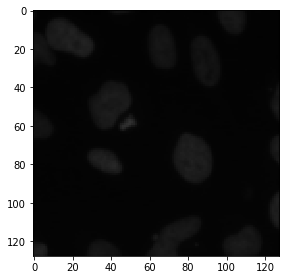

In [ ]:
random_image = rand.randint(0,len(train_ids))
imshow(X_train[random_image])
plt.show()

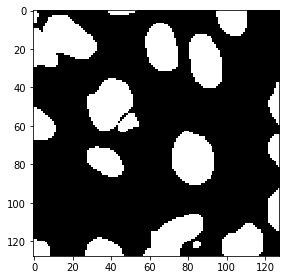

In [ ]:
imshow(np.squeeze(Y_train[random_image].astype(float)))
plt.show()

In [ ]:
#building the model

inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

#layers take floating point value as inputs, if 8 bit value is given, we need to convert it into float point values(4 bit)
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3), activation='relu', kernel_initializer='he_normal', padding = 'same')(c5)

#expansion path
u6 = tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4]) #concatenate() and Concatenate are 2 different function in keras
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64,(2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32,(2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16,(2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)



outputs = tf.keras.layers.Conv2D(1,(1,1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
#model checkpoint
filepath = '/content/drive/MyDrive/sementic_segmentation/model_for_nuclie.h5'
logs = '/content/drive/MyDrive/sementic_segmentation/logs'
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath, 
                                                  verbose=1,
                                                  best_save_only=True)
callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir=logs)]
             
model.fit(X_train, Y_train, validation_split=0.1, epochs=25, batch_size=16, callbacks=callbacks)

Epoch 1/25
38/38 [==============================] - 132s 3s/step - loss: 0.5505 - accuracy: 0.7931 - val_loss: 0.3353 - val_accuracy: 0.8105
Epoch 2/25
38/38 [==============================] - 128s 3s/step - loss: 0.2994 - accuracy: 0.7981 - val_loss: 0.2626 - val_accuracy: 0.8110
Epoch 3/25
38/38 [==============================] - 130s 3s/step - loss: 0.2465 - accuracy: 0.8538 - val_loss: 0.2043 - val_accuracy: 0.9231
Epoch 4/25
38/38 [==============================] - 121s 3s/step - loss: 0.1885 - accuracy: 0.9282 - val_loss: 0.1386 - val_accuracy: 0.9472
Epoch 5/25
38/38 [==============================] - 124s 3s/step - loss: 0.1443 - accuracy: 0.9455 - val_loss: 0.1266 - val_accuracy: 0.9506
Epoch 6/25
38/38 [==============================] - 117s 3s/step - loss: 0.1283 - accuracy: 0.9520 - val_loss: 0.1393 - val_accuracy: 0.9432
Epoch 7/25
38/38 [==============================] - 122s 3s/step - loss: 0.1214 - accuracy: 0.9541 - val_loss: 0.0990 - val_accuracy: 0.9628
Epoch 8/25
38

model.fit arguments:<br>
x = input training data<br>
y = input labels<br>
batch_size: no. of batches yoy want data to be devided<br>
epochs = 1 epoch is complete one cycle having forward and backward propogation<br>
verbose = what yoy want to see on the screen<br>
validation_split = 0.1(let) means 10% data you keep in validation set<br>

callbacks : There are many callbacks<br>
    a. One of the callback is Model Checkpoint<br>
        1. As the name suggest, it make checkpoints at different steps so that our complete training parameters doesn't get lost when something happens<br>
        ModelCheckpoint arguments: save_best_only, save_wights_only<br>
    b. Another famous callback is EarlyStopping<br>
        1. Sometimes we don't know what is the no. of epochs we need to run the system, if we run more epochs model may overfit, if we run less epochs model may underfit. We want to know when should model stop training thats when EarlyStopping comes into play<br>
        2. It monitor validation loss and has patience as argument, so if I set patience = 3, that means it will remember val_loss of previous 3 epochs and if model is not getting traing further, it will stop training.

**Difference between categorical and binary crossentropy loss.**<br>
The biggest difference would be that categorical crossentropy is based on the assumption that only 1 class is correct out of all possible ones (so output should be something like [0,0,0,1,0] if the rating is 4) while binary_crossentropy works on each individual output separately implying that each case can belong to multiple classes (for instance if predicting what items a customer will get it is possible that they will buy multiple ones; i.e. output like [0,1,0,1,0] is a valid one if you are using binary_crossentropy).

In [ ]:
#from numpy.core.fromnumeric import squeeze
idx = rand.randint(0,len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):],verbose=1)
preds_test = model.predict(X_test,verbose=1)

preds_train_t = (preds_train>0.5).astype(np.uint8)
preds_val_t = (preds_val>0.5).astype(np.uint8)
preds_test_t = (preds_test>0.5).astype(np.uint8)

3/3 [==============================] - 3s 639ms/step


Prediction on training data.....


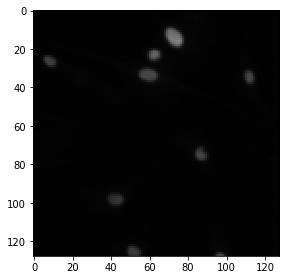

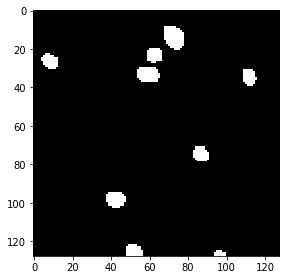

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


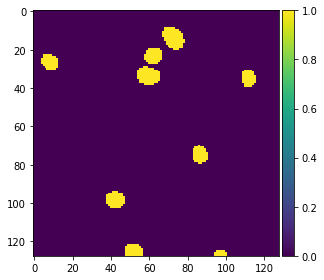

Prediction on test data.....


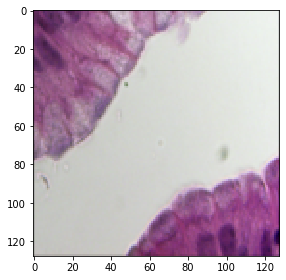

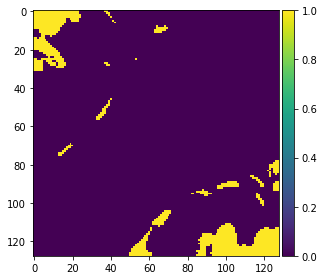

Prediction on validation data.....


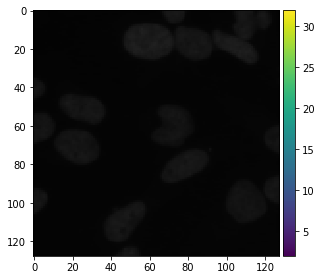

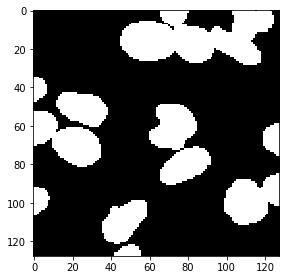

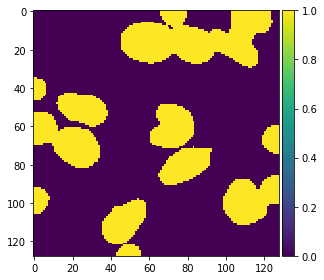

In [ ]:
ix = rand.randint(0,len(preds_train_t))

print('Prediction on training data.....')
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix].astype(float)))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

print('Prediction on test data.....')
ix = rand.randint(0,len(preds_test))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()

print('Prediction on validation data.....')
ix = rand.randint(0,len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix].astype(float)))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()